In [24]:
#import pysal as ps  # 1.5 or higher
import numpy as np  # 1.7 or higher
#import pandas as pd # 0.10 or higher
import matplotlib.pyplot as plt
import matplotlib
import math as m


%matplotlib inline
# suppress scientific notation, make columns nice
np.set_printoptions(suppress=True, formatter={'float_kind':'{:14.4f}'.format})  

In [2]:
# https://ezdxf.readthedocs.io/en/stable/tutorials/spline.html
import ezdxf
from ezdxf import bbox

In [3]:
doc = ezdxf.readfile("p-plate.dxf")
msp = doc.modelspace()
extents = bbox.extents(msp)
extents

BoundingBox([(-49.999999999999986, -65.0, 0.0), (50.0, 50.0, 0.0)])

In [4]:
lwp = msp.query('LWPOLYLINE')
len(lwp)


3

In [5]:
[str(x) for x in msp]

['CIRCLE(#100)',
 'CIRCLE(#101)',
 'CIRCLE(#102)',
 'CIRCLE(#103)',
 'CIRCLE(#104)',
 'CIRCLE(#105)',
 'CIRCLE(#106)',
 'CIRCLE(#107)',
 'LWPOLYLINE(#108)',
 'CIRCLE(#109)',
 'CIRCLE(#110)',
 'CIRCLE(#111)',
 'CIRCLE(#112)',
 'LWPOLYLINE(#113)',
 'LWPOLYLINE(#114)']

In [6]:
msp[0].dxf.center, msp[0].dxf.radius

(Vec3(0.0, 45.0, 0.0), 3.5000000000000004)

[[        0.0000       -40.0000         0.0000]
 [       40.0000        -0.0000         0.0000]
 [       40.0000       -60.0000         0.0000]
 [       50.0000       -60.0000         0.0000]
 [       50.0000        -0.0000         0.0000]
 [       -0.0000       -50.0000         0.0000]]
[[       42.5000       -20.0000         0.0000]
 [       42.5000       -10.0000         0.0000]
 [       47.5000       -10.0000         0.0000]
 [       47.5000       -20.0000         0.0000]]
[[       42.5000       -50.0000         0.0000]
 [       42.5000       -40.0000         0.0000]
 [       47.5000       -40.0000         0.0000]
 [       47.5000       -50.0000         0.0000]]
0.0 45.0 3.5000000000000004
-22.499999999999996 38.97114317029974 3.5000000000000004
-38.97114317029973 22.500000000000004 3.5000000000000004
-45.0 9.992007221626409e-15 3.5000000000000004
-38.97114317029975 -22.499999999999993 3.5000000000000004
-22.500000000000014 -38.971143170299726 3.5000000000000004
38.971143170299754 

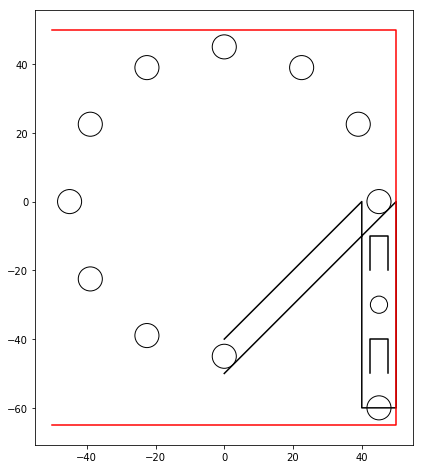

In [7]:
circs = msp.query('CIRCLE')
lwp = msp.query('LWPOLYLINE')

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
#plt.axis('equal')

#sx, sy = coastline2poly2(cl)
for p in lwp:
    ans = np.array(list(p.vertices_in_wcs())) 
    print(ans)
    sx, sy, sz = ans.transpose()
    ax.plot(sx, sy, "-k")

for c in circs:
    x, y, z = c.dxf.center
    r = c.dxf.radius
    print(x, y, r)
    #draw_circle = plt.Circle((x, y), r,fill=False, color='k')
    draw_circle = plt.Circle((x, y), r,fill=False)

    ax.add_artist(draw_circle)

ex, ey = np.array(extents.rect_vertices()).transpose()
ax.plot(ex, ey, "-r")
#plt.fill(sx, sy, "b")
plt.show()

In [8]:
len(circs)

12

In [9]:
for s in lwp[0]:
    x, y, sw, ew, b = s
    print(x, y, b)

9.089986237012597e-16 -40.0 -2.4142135623730945
40.0 -8.881784197001252e-15 0.0
40.0 -60.0 0.9999999999999999
50.0 -60.0 0.0
50.0 -8.048602713978574e-15 2.4142135623730945
-8.048602713978576e-15 -50.0 0.9999999999999999


In [10]:
ve = list(lwp[0].virtual_entities())
ve

[<class 'ezdxf.entities.arc.Arc'> ARC(#None),
 <class 'ezdxf.entities.line.Line'> LINE(#None),
 <class 'ezdxf.entities.arc.Arc'> ARC(#None),
 <class 'ezdxf.entities.line.Line'> LINE(#None),
 <class 'ezdxf.entities.arc.Arc'> ARC(#None),
 <class 'ezdxf.entities.arc.Arc'> ARC(#None)]

In [11]:
for e in ve:
    if e.__class__ == ezdxf.entities.arc.Arc:
        print("arc ", e)
    elif e.__class__ == ezdxf.entities.line.Line:
        print("line ", e)
    else:
        print("unknown ", e)
    

arc  ARC(#None)
line  LINE(#None)
arc  ARC(#None)
line  LINE(#None)
arc  ARC(#None)
arc  ARC(#None)


In [12]:
vd = ve[0].dxf
vd.radius, vd.center, vd.start_angle, vd.end_angle

(39.999999999999986,
 Vec3(8.256879418585376e-15, -1.4210854715202004e-14, 0.0),
 7.633331235512441e-15,
 -90.00000000000001)

In [18]:
vl = ve[1].dxf
vl.start, vl.end

x, y, z = np.array((vl.start, vl.end)).transpose()
x, y

(array([       40.0000,        40.0000]),
 array([       -0.0000,       -60.0000]))

arc  ARC(#None)
line  LINE(#None)
arc  ARC(#None)
line  LINE(#None)
arc  ARC(#None)
arc  ARC(#None)
line  LINE(#None)
arc  ARC(#None)
line  LINE(#None)
arc  ARC(#None)
line  LINE(#None)
arc  ARC(#None)
line  LINE(#None)
arc  ARC(#None)
0.0 45.0 3.5000000000000004
-22.499999999999996 38.97114317029974 3.5000000000000004
-38.97114317029973 22.500000000000004 3.5000000000000004
-45.0 9.992007221626409e-15 3.5000000000000004
-38.97114317029975 -22.499999999999993 3.5000000000000004
-22.500000000000014 -38.971143170299726 3.5000000000000004
38.971143170299754 22.499999999999968 3.5000000000000004
22.500000000000018 38.971143170299726 3.5000000000000004
45.0 0.0 3.4999999999999964
0.0 -45.0 3.4999999999999964
45.0 -60.0 3.4999999999999964
45.0 -30.0 2.4999999999999964


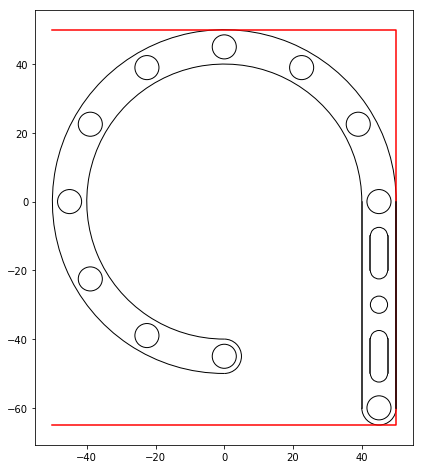

In [27]:
circs = msp.query('CIRCLE')
lwp = msp.query('LWPOLYLINE')

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
#plt.axis('equal')
ex, ey = np.array(extents.rect_vertices()).transpose()
ax.plot(ex, ey, "-r")

#sx, sy = coastline2poly2(cl)
for p in lwp:
    #ans = np.array(list(p.vertices_in_wcs())) 
    #print(ans)
    #sx, sy, sz = ans.transpose()
    #ax.plot(sx, sy, "-k")
    ve = p.virtual_entities()
    for ent in ve:
        if ent.__class__ == ezdxf.entities.arc.Arc:
            vd = ent.dxf
            draw_arc = matplotlib.patches.Arc(vd.center, 2*vd.radius, 2*vd.radius, 
                       angle=0.0, theta1=vd.start_angle, theta2=vd.end_angle, color='k')
            ax.add_artist(draw_arc)
            print("arc ", ent)
        elif ent.__class__ == ezdxf.entities.line.Line:
            vl = ent.dxf
            x, y, z = np.array((vl.start, vl.end)).transpose()
            ax.plot(x, y, "-k")
            print("line ", ent)
        else:
            print("unknown ", ent)

for c in circs:
    x, y, z = c.dxf.center
    r = c.dxf.radius
    print(x, y, r)
    #draw_circle = plt.Circle((x, y), r,fill=False, color='k')
    draw_circle = plt.Circle((x, y), r,fill=False)

    ax.add_artist(draw_circle)


#plt.fill(sx, sy, "b")
plt.show()

